In [11]:
from Binance.Data import Binance_Histo as Histo
from Binance.Data import Binance_Live as live
from Binance.Dao import Drivers_MongoDB as DAO_MB
from Binance.Dao import Drivers_SQlite as DAO_SQL

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
PathDatabase = '/home/arnold/ENV_VIRTUEL/ATU_FORMATION/REP_DEV/Projet_OPA/DataBase/SQLite/test.db'
SQL = DAO_SQL.Drivers_SQLite(PathDatabase)

<AxesSubplot: xlabel='id_temps'>

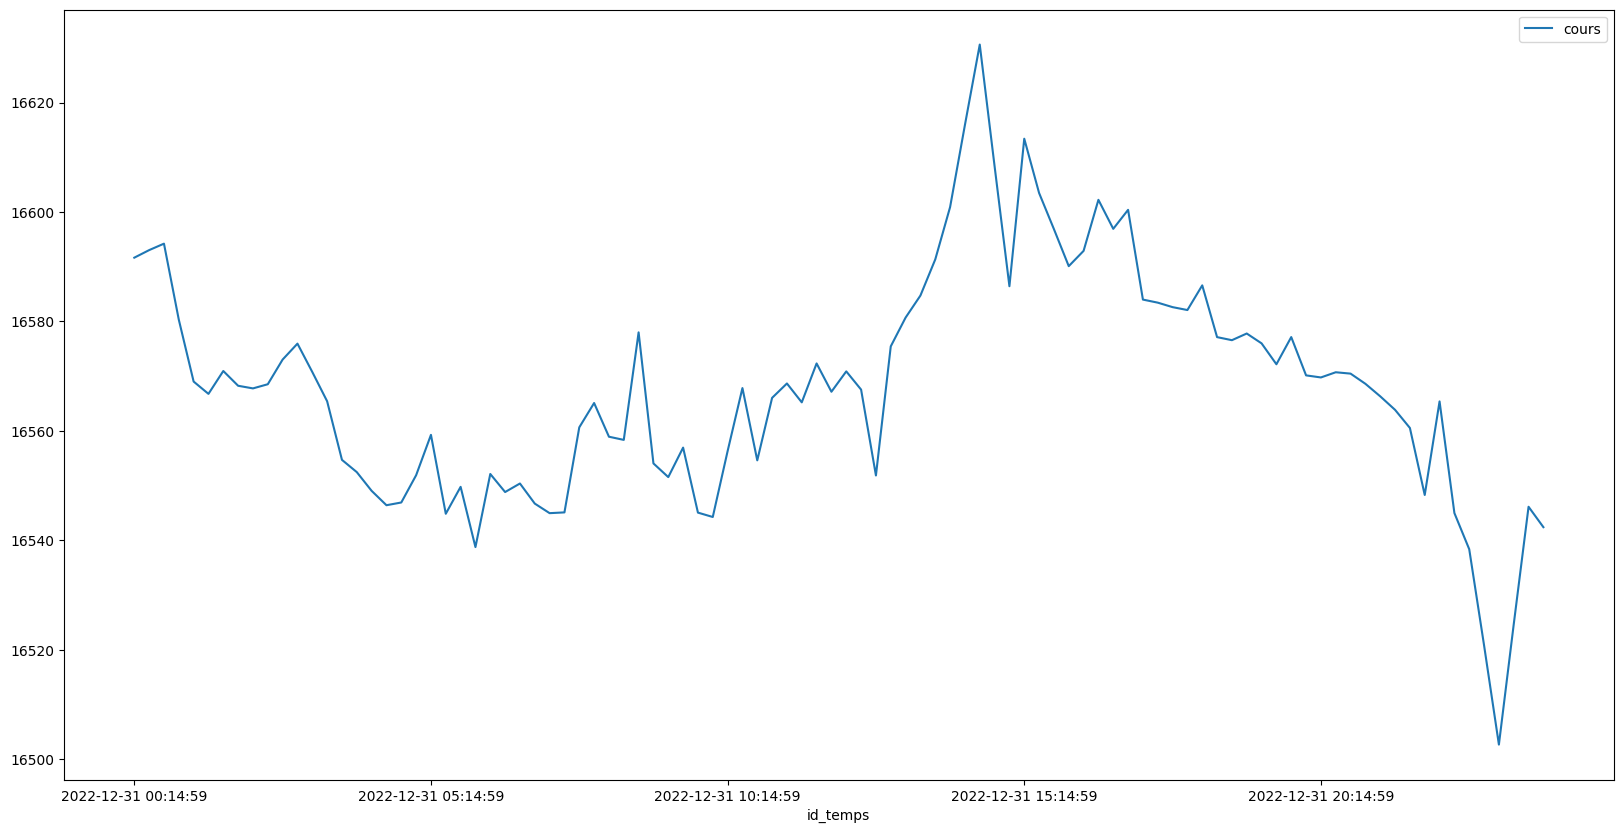

In [57]:
res = SQL.Select("select datetime(id_temps/1000,'unixepoch'), VALEUR_COURS, IND_RSI, IND_TRIX, IND_QUOTEVOLUME from FAIT_SIT_COURS_HIST where julianday(current_date) - julianday(datetime(id_temps/1000,'unixepoch')) < 29 ;")

L = list()
for i in res:
    (a,b, c, d, e) = i
    L.append({'id_temps' : a, 'cours' : b, 'rsi' : c, 'trix' : d, 'volume' : e})
    
#print(L)

df = pd.DataFrame(L)

df[['id_temps','volume']]

df.plot(x ='id_temps', y = ['cours'], figsize = (20, 10) )

#plt.plot(df['id_temps'],  df['cours'],label ='cours')
#plt.plot(df['id_temps'],  df['rsi'], label ='rsi')
#plt.plot(df['id_temps'],  df['trix'], label ='trix')

#plt.bar(df['id_temps'], df['volume'], label = 'volume')
#plt.legend()